In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

# Any results you write to the current directory are saved as output.

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import re
import string

In [3]:
train = pd.read_csv("C:/Users/mkkma/Downloads/train.csv")
test = pd.read_csv("C:/Users/mkkma/Downloads//test.csv")

FileNotFoundError: [Errno 2] File b'C:/Users/mkkma/Downloads/train.csv' does not exist: b'C:/Users/mkkma/Downloads/train.csv'

In [4]:
print (train.shape, test.shape)

NameError: name 'train' is not defined

A quick look at our data
Let's look at our data... first, an example of what is NOT a disaster tweet.


In [5]:
train[train["target"] == 0]["text"].values[1]

NameError: name 'train' is not defined

And one that is:

In [6]:
train[train["target"] == 1]["text"].values[1]

NameError: name 'train' is not defined

In [7]:
x=train.target.value_counts()
plt.bar(x.index,x)
plt.ylabel('samples')

NameError: name 'train' is not defined

There are more tweets with class 0 ( No disaster) than class 1 ( disaster tweets)

First,we will do very basic analysis,that is character level,word level and sentence level analysis.

**Number of characters in tweets**

NameError: name 'train' is not defined

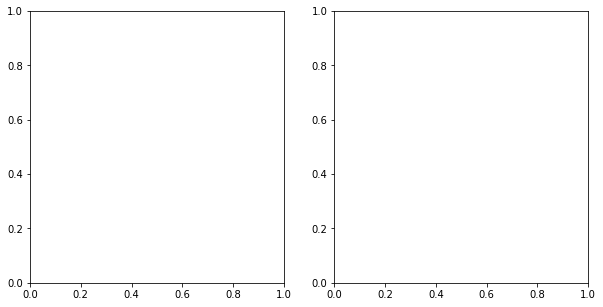

In [8]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
tweet_len=train[train['target']==1]['text'].str.len()
ax1.hist(tweet_len, color = 'red', bins = 50)
ax1.set_title('disaster tweets')
tweet_len=train[train['target']==0]['text'].str.len()
ax2.hist(tweet_len, color = 'green', bins = 50)
ax2.set_title('Not disaster tweets')
fig.suptitle('Characters in tweets')
plt.show()

The distributions seem very similar, both seem to have 125 to 140 characters

**Number of words in a tweet**

NameError: name 'train' is not defined

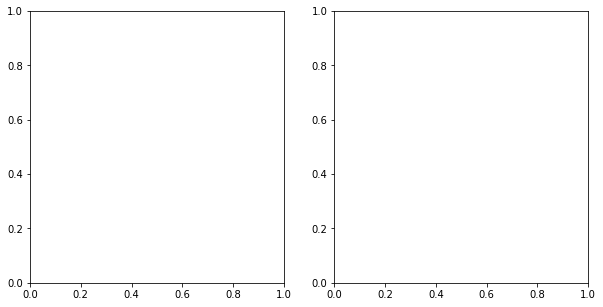

In [9]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
tweet_len=train[train['target']==1]['text'].str.split().map(lambda x: len(x))
ax1.hist(tweet_len,color='red', bins =50)
ax1.set_title('disaster tweets')
tweet_len=train[train['target']==0]['text'].str.split().map(lambda x: len(x))
ax2.hist(tweet_len,color='green', bins =50)
ax2.set_title('Not disaster tweets')
fig.suptitle('Words in a tweet')
plt.show()

Not much can be infered from the plots above.

We will now try to clean the data

In [10]:
df=pd.concat([train,test])
df.shape

NameError: name 'train' is not defined

In [11]:
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)
df['text']=df['text'].apply(lambda x : remove_URL(x))

NameError: name 'df' is not defined

In [12]:
def remove_punct(text):
    table=str.maketrans('','',string.punctuation)
    return text.translate(table)
df['text']=df['text'].apply(lambda x : remove_punct(x))

NameError: name 'df' is not defined

In [13]:
!pip install pyspellchecker



ERROR: Could not find a version that satisfies the requirement pyspellchecker (from versions: none)
ERROR: No matching distribution found for pyspellchecker


In [14]:
from spellchecker import SpellChecker

spell = SpellChecker()
def correct_spellings(text):
    corrected_text = []
    misspelled_words = spell.unknown(text.split())
    for word in text.split():
        if word in misspelled_words:
            corrected_text.append(spell.correction(word))
        else:
            corrected_text.append(word)
    return " ".join(corrected_text)
        


ModuleNotFoundError: No module named 'spellchecker'

In [15]:
from tqdm import tqdm

### Summary of cleaning above:

1. URL removed
2. !"#$%&'()*+, -./:;<=>?@[\]^_`{|}~ removed
3. Spellings corrected

### In the section below following steps are performed

1. Convert everything to lower case
2. Remove digits
3. Lemmatisation
4. Stop words removal

In [16]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text. substitute the matched string in REPLACE_BY_SPACE_RE with space.
    text = BAD_SYMBOLS_RE.sub('', text) # remove symbols which are in BAD_SYMBOLS_RE from text. substitute the matched string in BAD_SYMBOLS_RE with nothing. 
    text = text.replace('x', '')
#    text = re.sub(r'\W+', '', text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwors from text
    return text

NameError: name 'stopwords' is not defined

In [17]:
df['text'] = df['text'].apply(clean_text)
df['text'] = df['text'].str.replace('\d+', '')

NameError: name 'df' is not defined

In [18]:

from sklearn import feature_extraction, linear_model, model_selection, preprocessing
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet

In [19]:
df.head()

NameError: name 'df' is not defined

In [20]:
lemmatizer = nltk.stem.WordNetLemmatizer()
wordnet_lemmatizer = WordNetLemmatizer()

In [21]:
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

In [22]:
def lemmatize_sentence(sentence):
    #tokenize the sentence and find the POS tag for each token
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:
            #else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)

In [23]:
df['Lemmatize'] = df['text'].apply(lambda x: lemmatize_sentence(x))
df.head()

NameError: name 'df' is not defined

In [24]:
# Import stopwords with nltk.
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [25]:
df['lemmatize_without_stopwords'] = df['Lemmatize'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df.head()

NameError: name 'df' is not defined

In [26]:
#Dropping columns text and lemmatize
df.drop(['text','Lemmatize'],axis = 1,inplace = True)

NameError: name 'df' is not defined

In [27]:
df.head()

NameError: name 'df' is not defined

In [28]:
df.to_csv('Final_PA2_data.csv' ,index =False)

NameError: name 'df' is not defined